In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('_data/complaints_processed.csv')[['narrative', 'product']]
data.dropna(inplace = True)
data.reset_index(inplace=True)

In [3]:
data

,index,narrative,product
0,0,purchase order day shipping amount receive pro...,credit_card
1,1,forwarded message date tue subject please inve...,credit_card
2,2,forwarded message cc sent friday pdt subject f...,retail_banking
3,3,payment history missing credit report speciali...,credit_reporting
4,4,payment history missing credit report made mis...,credit_reporting
...,...,...,...
162406,162416,name,debt_collection
162407,162417,name,credit_card
162408,162418,name,debt_collection
162409,162419,name,credit_card


In [4]:
data.shape

(162411, 3)

In [5]:
data['product'].value_counts(normalize = True)

credit_reporting       0.561366
debt_collection        0.142527
mortgages_and_loans    0.116926
credit_card            0.095843
retail_banking         0.083338
Name: product, dtype: float64

In [6]:
x = data['narrative']
lens = x.apply(lambda i: len(i.split(' ')))

In [7]:
lens

0         230
1         132
2         173
3         131
4         123
         ... 
162406      1
162407      1
162408      1
162409      1
162410      1
Name: narrative, Length: 162411, dtype: int64

In [8]:
import numpy as np
print(max(lens))
print(min(lens))
print(np.mean(lens))

2685
1
80.23279827105307


(array([1.357e+03, 3.357e+03, 4.073e+03, 3.153e+03, 6.080e+03, 5.185e+03,
        3.766e+03, 6.025e+03, 5.499e+03, 3.834e+03, 5.466e+03, 6.077e+03,
        4.252e+03, 5.691e+03, 4.872e+03, 3.310e+03, 4.692e+03, 3.973e+03,
        2.757e+03, 3.762e+03, 4.129e+03, 3.624e+03, 2.097e+03, 3.147e+03,
        3.149e+03, 1.856e+03, 2.597e+03, 2.487e+03, 1.464e+03, 2.071e+03,
        2.063e+03, 1.267e+03, 1.749e+03, 1.766e+03, 1.115e+03, 2.127e+03,
        1.675e+03, 1.155e+03, 1.435e+03, 1.395e+03, 1.408e+03, 8.120e+02,
        1.124e+03, 1.130e+03, 7.110e+02, 9.840e+02, 9.140e+02, 6.310e+02,
        8.960e+02, 8.730e+02, 5.410e+02, 7.200e+02, 6.970e+02, 4.920e+02,
        6.850e+02, 6.050e+02, 4.380e+02, 6.540e+02, 6.690e+02, 6.560e+02,
        4.470e+02, 4.970e+02, 4.890e+02, 2.660e+02, 4.180e+02, 4.520e+02,
        3.010e+02, 4.340e+02, 4.430e+02, 2.540e+02, 3.650e+02, 3.480e+02,
        2.130e+02, 4.340e+02, 4.690e+02, 2.100e+02, 2.830e+02, 2.800e+02,
        3.950e+02, 2.550e+02, 2.570e+0

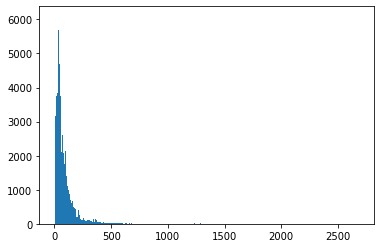

In [9]:
import matplotlib.pyplot as plt
plt.hist(lens, bins = 1000)

In [10]:
len_counts = lens.value_counts(normalize = True).sort_index()[:100]

In [11]:
# Samples of <= 100 words in length compose 77% of total samples  
sum(len_counts)

0.7731249730621697

In [12]:
# Samples of <= 300 words in length compose 96% of total samples  
len_counts_3 = lens.value_counts(normalize = True).sort_index()[:300]
sum(len_counts_3)

0.9670404098244587

In [29]:
from nltk import word_tokenize
x_s = set(word_tokenize(' '.join(data.sample(frac = 0.025)['narrative'].values)))